In [1]:
import uproot
import awkward as ak
import mplhep
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Effcy_SN(condition,tp):
    indx1 = np.where(condition)[0]
    SN = np.where(mc_type[indx1]==tp)[0].size/len(indx1)
    eff = 0
    aux = {}
    for i in mc_type[indx1]:
        if i==tp: continue
        if i in aux.keys(): aux[i]+=1
        else: aux[i] = 1
    for i in aux.keys(): aux[i]=np.round(100*aux[i]/len(indx1),3)
    if tp=="ELECTRON": eff = 100*np.where(mc_type[indx1]==tp)[0].size/len(mc_ee)
    elif tp=="MUON":   eff = 100*np.where(mc_type[indx1]==tp)[0].size/len(mc_mm)
    elif tp=="TAUS":   eff = 100*np.where(mc_type[indx1]==tp)[0].size/len(mc_tt)
    elif tp=="HADRON": eff = 100*np.where(mc_type[indx1]==tp)[0].size/len(mc_qq)
    return np.array([[eff,SN,aux]])

In [3]:
path_mc = './opal_data/mc/'

### Open the file introducing file path
file_ee = uproot.open(path_mc+'ee.root')
file_mm = uproot.open(path_mc+'mm.root')
file_tt = uproot.open(path_mc+'tt.root')
file_qq = uproot.open(path_mc+'qq.root')

ttree_name = 'myTTree'

### Print list of 'branches' of the TTree (i.e. list of variable names)
file_tt[ttree_name].keys()

## Load branches
mc_ee = file_ee[ttree_name].arrays()
mc_mm = file_mm[ttree_name].arrays()
mc_tt = file_tt[ttree_name].arrays()
mc_qq = file_qq[ttree_name].arrays()

mc_ee = ak.to_numpy(mc_ee)
mc_mm = ak.to_numpy(mc_mm)
mc_tt = ak.to_numpy(mc_tt)
mc_qq = ak.to_numpy(mc_qq)

mc_type = np.concatenate((["ELECTRON"]*len(mc_ee),["MUON"]*len(mc_mm),["TAUS"]*len(mc_tt),["HADRON"]*len(mc_qq)))
mc_all = np.concatenate((mc_ee,mc_mm,mc_tt,mc_qq))

In [4]:
#Cuts for ELECTRONS
e_cut = np.empty((0,3))
e_cut = np.append(e_cut,Effcy_SN(mc_all["E_ecal"]>=75,"ELECTRON"),axis=0)
e_cut = np.append(e_cut,Effcy_SN(mc_all["E_hcal"]<=2,"ELECTRON"),axis=0)
e_cut = np.append(e_cut,Effcy_SN((mc_all["E_ecal"]>=65) & (mc_all["Ncharged"]<10),"ELECTRON"),axis=0)
print("Electron: " + str(e_cut))

#Cuts for MUONS
mu_cut = np.empty((0,3))
mu_cut = np.append(mu_cut,Effcy_SN(mc_all["Pcharged"]>=80,"MUON"),axis=0)
mu_cut = np.append(mu_cut,Effcy_SN(mc_all["E_ecal"]<=10,"MUON"),axis=0)
cond = (mc_all["Pcharged"]>=65) & (mc_all["E_ecal"]<75) & (mc_all["Ncharged"]<10)
mu_cut = np.append(mu_cut,Effcy_SN(cond,"MUON"),axis=0)
print("Muon: " + str(mu_cut))

#Cuts for Hadrons
had_cut = np.empty((0,3))
had_cut = np.append(had_cut,Effcy_SN(mc_all["Ncharged"]>=7,"HADRON"),axis=0)
print("Hadron: " + str(had_cut))

#Cuts for TAUS
tau_cut = np.empty((0,3))
cond = (mc_all["Ncharged"]<10) & (mc_all["E_ecal"]>=5) & (mc_all["E_ecal"]<75) & (mc_all["Pcharged"]<80)
tau_cut = np.append(tau_cut,Effcy_SN(cond,"TAUS"),axis=0)
print("Tau: " + str(tau_cut))

Electron: [[96.50647107737575 0.956479016102447
  {'MUON': 0.001, 'TAUS': 0.411, 'HADRON': 3.94}]
 [87.27639069529434 0.6345049409029258
  {'MUON': 13.775, 'TAUS': 20.484, 'HADRON': 2.29}]
 [99.00854992430865 0.9751569751569752
  {'MUON': 0.002, 'TAUS': 1.89, 'HADRON': 0.592}]]
Muon: [[88.61953147349573 0.7271462725494457
  {'ELECTRON': 23.79, 'TAUS': 0.612, 'HADRON': 2.883}]
 [93.2179146226465 0.9127881642562198 {'TAUS': 8.721}]
 [93.04838897659486 0.9479604062995866
  {'ELECTRON': 0.869, 'TAUS': 4.163, 'HADRON': 0.172}]]


Hadron: [[99.47241865608798 0.9898933807196801 {'ELECTRON': 0.025, 'TAUS': 0.985}]]
Tau: [[93.34461080112101 0.8721838212743872
  {'ELECTRON': 3.213, 'MUON': 5.961, 'HADRON': 3.607}]]


In [131]:
n = -100
a = np.empty((0,4))
for i in range(50,100):
    print(i)
    for j in range(5,50):
        val = Effcy_SN((mc_all["E_ecal"]>=i) & (mc_all["Ncharged"]<j),"ELECTRON")
        a = np.append(a,np.array([[val[0][0],val[0][1],i,j]]),axis=0)
        if val[0][0]*val[0][1]>n: 
            aux_cut = (i,j)
            n=val[0][0]*val[0][1]

50


51


52


53


54


55


56


57


58


59


60


61


62


63


64


65


66


67


68


69


70


71


72


73


74


75


76


77


78


79


80


81


82


83


84


85


86


87


88


89


90


91


92


93


94


95


96


97


98


99


In [136]:
b = np.zeros((50,45))
for i in range(len(a)):
    x = int(a[:,2][i])-50
    y = int(a[:,3][i])-5
    b[x][y] = a[:,1][i]*a[:,0][i]/100

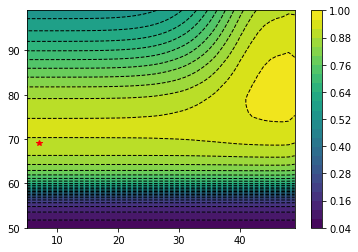

In [157]:
plt.contourf(np.arange(len(b[0]))[::-1]+5,np.arange(len(b))[::-1]+50,b,25)
plt.colorbar()
plt.contour(np.arange(len(b[0]))[::-1]+5,np.arange(len(b))[::-1]+50,b,25,colors="k",linestyles="dashed",linewidths=1)
plt.plot(7,69,"*",c="r")
# plt.xlim(5,10)
# plt.ylim(60,80)

In [138]:
aux_cut

(69, 7)

In [158]:
e_cut = np.append(e_cut,Effcy_SN((mc_all["E_ecal"]>=aux_cut[0]) & (mc_all["Ncharged"]<aux_cut[1]),"ELECTRON"),axis=0)
print("Electron: " + str(e_cut))

Electron: [[96.50647107737575 0.956479016102447
  {'MUON': 0.001, 'TAUS': 0.411, 'HADRON': 3.94}]
 [87.27639069529434 0.6345049409029258
  {'MUON': 13.775, 'TAUS': 20.484, 'HADRON': 2.29}]
 [99.00854992430865 0.9751569751569752
  {'MUON': 0.002, 'TAUS': 1.89, 'HADRON': 0.592}]
 [98.40195305004158 0.9889430545883109
  {'MUON': 0.001, 'TAUS': 1.057, 'HADRON': 0.047}]]


In [161]:
n = -100
a = np.empty((0,4))
for i in np.arange(68,70,.1):
    print(i)
    for j in range(5,50):
        val = Effcy_SN((mc_all["E_ecal"]>=i) & (mc_all["Ncharged"]<j),"ELECTRON")
        a = np.append(a,np.array([[val[0][0],val[0][1],i,j]]),axis=0)
        if val[0][0]*val[0][1]>n: 
            aux_cut = (i,j)
            n=val[0][0]*val[0][1]

68.0


68.1


68.19999999999999


68.29999999999998


68.39999999999998


68.49999999999997


68.59999999999997


68.69999999999996


68.79999999999995


68.89999999999995


68.99999999999994


69.09999999999994


69.19999999999993


69.29999999999993


69.39999999999992


69.49999999999991


69.59999999999991


69.6999999999999


69.7999999999999


69.89999999999989


In [162]:
e_cut = np.append(e_cut,Effcy_SN((mc_all["E_ecal"]>=aux_cut[0]) & (mc_all["Ncharged"]<aux_cut[1]),"ELECTRON"),axis=0)
print("Electron: " + str(e_cut))

Electron: [[96.50647107737575 0.956479016102447
  {'MUON': 0.001, 'TAUS': 0.411, 'HADRON': 3.94}]
 [87.27639069529434 0.6345049409029258
  {'MUON': 13.775, 'TAUS': 20.484, 'HADRON': 2.29}]
 [99.00854992430865 0.9751569751569752
  {'MUON': 0.002, 'TAUS': 1.89, 'HADRON': 0.592}]
 [98.40195305004158 0.9889430545883109
  {'MUON': 0.001, 'TAUS': 1.057, 'HADRON': 0.047}]
 [98.40195305004158 0.9889430545883109
  {'MUON': 0.001, 'TAUS': 1.057, 'HADRON': 0.047}]]


In [163]:
aux_cut

(68.99999999999994, 7)